In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\Shin\Desktop\for-kr-pjt\NoonMap-Project\data\file_data\교량_기준_임시_최종db.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4097832 entries, 0 to 4097831
Data columns (total 15 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   Unnamed: 0.1        int64  
 2   bridge_name         object 
 3   address             object 
 4   etc_address         object 
 5   latitude            float64
 6   longitude           float64
 7   brid_height_origin  float64
 8   location_start      object 
 9   wl_station_code     int64  
 10  rf_station_code     int64  
 11  obs_date            object 
 12  WL                  float64
 13  rainfall            float64
 14  bridge_height       float64
dtypes: float64(6), int64(4), object(5)
memory usage: 469.0+ MB


In [4]:
df['obs_date'] = pd.to_datetime(df['obs_date'])

In [5]:
bridge_list = pd.unique(df['location_start']).tolist()

In [6]:
len(bridge_list)

54

In [7]:
df_list = [df[df['location_start']==i] for i in bridge_list]

In [8]:
for i in range(len(bridge_list)):
    df_list[i] = df_list[i].drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'bridge_name', 'address', 'etc_address', 'latitude', 'longitude',
                                          'location_start', 'wl_station_code', 'rf_station_code', 'rainfall', 'brid_height_origin', 'bridge_height'])
    df_list[i].rename({'obs_date':'time', 'WL':'value'}, axis=1, inplace=True)

In [9]:
df_list[0]

,time,value
0,2010-02-25 12:00:00,3.0
1,2010-02-25 13:00:00,6.0
2,2010-02-25 14:00:00,10.0
3,2010-02-25 15:00:00,14.0
4,2010-02-25 16:00:00,18.0
...,...,...
84484,2020-08-26 21:00:00,12.0
84485,2020-08-26 22:00:00,12.0
84486,2020-08-26 23:00:00,16.0
84487,2020-08-27 00:00:00,17.0


In [10]:
import matplotlib.pyplot as plt

In [11]:
import numpy as np

In [12]:
from datetime import datetime 

In [13]:
split_date = pd.Timestamp('01-01-2018')

In [14]:
split_date

Timestamp('2018-01-01 00:00:00')

In [15]:
df_list[0][df_list[0]['time'] < split_date]

,time,value
0,2010-02-25 12:00:00,3.0
1,2010-02-25 13:00:00,6.0
2,2010-02-25 14:00:00,10.0
3,2010-02-25 15:00:00,14.0
4,2010-02-25 16:00:00,18.0
...,...,...
62058,2017-12-31 19:00:00,-32.0
62059,2017-12-31 20:00:00,-32.0
62060,2017-12-31 21:00:00,-33.0
62061,2017-12-31 22:00:00,-33.0


In [16]:
train_value = df_list[0][df_list[0]['time'] < split_date]['value']
test_value = df_list[0][df_list[0]['time'] >= split_date]['value']

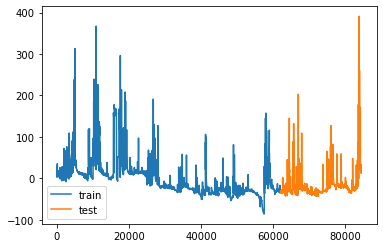

In [17]:
ax = train_value.plot()
test_value.plot(ax=ax)
plt.legend(['train', 'test'])

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
sc = MinMaxScaler()

In [20]:
train_arr = np.array(train_value).reshape(-1,1)

In [21]:
test_arr = np.array(test_value).reshape(-1,1)

In [22]:
train_sc = sc.fit_transform(train_arr)
test_sc = sc.transform(test_arr)

In [23]:
train_sc

array([[0.19646799],
       [0.20309051],
       [0.21192053],
       ...,
       [0.11699779],
       [0.11699779],
       [0.11699779]])

In [24]:
train = df_list[0][df_list[0]['time'] < split_date]
test = df_list[0][df_list[0]['time'] >= split_date]

In [25]:
train = train.set_index('time')
test = test.set_index('time')

In [26]:
train

,value
time,
2010-02-25 12:00:00,3.0
2010-02-25 13:00:00,6.0
2010-02-25 14:00:00,10.0
2010-02-25 15:00:00,14.0
2010-02-25 16:00:00,18.0
...,...
2017-12-31 19:00:00,-32.0
2017-12-31 20:00:00,-32.0
2017-12-31 21:00:00,-33.0


In [27]:
train_sc_df = pd.DataFrame(train_sc, columns=['std_value'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['std_value'], index=test.index)

In [28]:
train_sc_df

,std_value
time,
2010-02-25 12:00:00,0.196468
2010-02-25 13:00:00,0.203091
2010-02-25 14:00:00,0.211921
2010-02-25 15:00:00,0.220751
2010-02-25 16:00:00,0.229581
...,...
2017-12-31 19:00:00,0.119205
2017-12-31 20:00:00,0.119205
2017-12-31 21:00:00,0.116998


In [29]:
train['std_value'] = train_sc_df['std_value']
test['std_value'] = test_sc_df['std_value']

In [30]:
train.drop(['value'], axis=1, inplace=True)
test.drop(['value'], axis=1, inplace=True)

In [31]:
train

,std_value
time,
2010-02-25 12:00:00,0.196468
2010-02-25 13:00:00,0.203091
2010-02-25 14:00:00,0.211921
2010-02-25 15:00:00,0.220751
2010-02-25 16:00:00,0.229581
...,...
2017-12-31 19:00:00,0.119205
2017-12-31 20:00:00,0.119205
2017-12-31 21:00:00,0.116998


In [32]:
for s in range(12):
    train['shift_{}'.format(s)] = train['std_value'].shift(s)
    test['shift_{}'.format(s)] = test['std_value'].shift(s)

In [33]:
train.head(10)

,std_value,shift_0,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11
time,,,,,,,,,,,,,
2010-02-25 12:00:00,0.196468,0.196468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-25 13:00:00,0.203091,0.203091,0.196468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-25 14:00:00,0.211921,0.211921,0.203091,0.196468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-25 15:00:00,0.220751,0.220751,0.211921,0.203091,0.196468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-25 16:00:00,0.229581,0.229581,0.220751,0.211921,0.203091,0.196468,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-25 17:00:00,0.238411,0.238411,0.229581,0.220751,0.211921,0.203091,0.196468,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-25 18:00:00,0.245033,0.245033,0.238411,0.229581,0.220751,0.211921,0.203091,0.196468,NaN,NaN,NaN,NaN,NaN
2010-02-25 19:00:00,0.249448,0.249448,0.245033,0.238411,0.229581,0.220751,0.211921,0.203091,0.196468,NaN,NaN,NaN,NaN
2010-02-25 20:00:00,0.249448,0.249448,0.249448,0.245033,0.238411,0.229581,0.220751,0.211921,0.203091,0.196468,NaN,NaN,NaN


In [34]:
X_train = train.dropna().drop('std_value', axis=1)
y_train = train.dropna()[['std_value']]

X_test = test.dropna().drop('std_value', axis=1)
y_test = test.dropna()[['std_value']]

In [35]:
X_train.head(10)

,shift_0,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11
time,,,,,,,,,,,,
2010-02-25 23:00:00,0.251656,0.251656,0.251656,0.249448,0.249448,0.245033,0.238411,0.229581,0.220751,0.211921,0.203091,0.196468
2010-02-26 00:00:00,0.249448,0.251656,0.251656,0.251656,0.249448,0.249448,0.245033,0.238411,0.229581,0.220751,0.211921,0.203091
2010-02-26 01:00:00,0.247241,0.249448,0.251656,0.251656,0.251656,0.249448,0.249448,0.245033,0.238411,0.229581,0.220751,0.211921
2010-02-26 02:00:00,0.245033,0.247241,0.249448,0.251656,0.251656,0.251656,0.249448,0.249448,0.245033,0.238411,0.229581,0.220751
2010-02-26 03:00:00,0.242826,0.245033,0.247241,0.249448,0.251656,0.251656,0.251656,0.249448,0.249448,0.245033,0.238411,0.229581
2010-02-26 04:00:00,0.240618,0.242826,0.245033,0.247241,0.249448,0.251656,0.251656,0.251656,0.249448,0.249448,0.245033,0.238411
2010-02-26 05:00:00,0.238411,0.240618,0.242826,0.245033,0.247241,0.249448,0.251656,0.251656,0.251656,0.249448,0.249448,0.245033
2010-02-26 06:00:00,0.236203,0.238411,0.240618,0.242826,0.245033,0.247241,0.249448,0.251656,0.251656,0.251656,0.249448,0.249448
2010-02-26 07:00:00,0.233996,0.236203,0.238411,0.240618,0.242826,0.245033,0.247241,0.249448,0.251656,0.251656,0.251656,0.249448


In [36]:
y_train

,std_value
time,
2010-02-25 23:00:00,0.251656
2010-02-26 00:00:00,0.249448
2010-02-26 01:00:00,0.247241
2010-02-26 02:00:00,0.245033
2010-02-26 03:00:00,0.242826
...,...
2017-12-31 19:00:00,0.119205
2017-12-31 20:00:00,0.119205
2017-12-31 21:00:00,0.116998


In [37]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [38]:
X_train = X_train.values
print(type(X_train))

<class 'numpy.ndarray'>


In [39]:
X_test= X_test.values
y_train = y_train.values
y_test = y_test.values

In [40]:
print(X_train.shape)
print(y_train.shape)

(62052, 12)
(62052, 1)


In [41]:
X_train_t = X_train.reshape(X_train.shape[0], 12, 1)
X_test_t = X_test.reshape(X_test.shape[0], 12, 1)

print("최종 DATA")
print(X_train_t.shape)
print(X_train_t)
print(y_train)

최종 DATA
(62052, 12, 1)
[[[0.25165563]
  [0.25165563]
  [0.25165563]
  ...
  [0.21192053]
  [0.20309051]
  [0.19646799]]

 [[0.24944812]
  [0.25165563]
  [0.25165563]
  ...
  [0.22075055]
  [0.21192053]
  [0.20309051]]

 [[0.24724062]
  [0.24944812]
  [0.25165563]
  ...
  [0.22958057]
  [0.22075055]
  [0.21192053]]

 ...

 [[0.11699779]
  [0.1192053 ]
  [0.1192053 ]
  ...
  [0.12362031]
  [0.12362031]
  [0.12362031]]

 [[0.11699779]
  [0.11699779]
  [0.1192053 ]
  ...
  [0.12362031]
  [0.12362031]
  [0.12362031]]

 [[0.11699779]
  [0.11699779]
  [0.11699779]
  ...
  [0.12362031]
  [0.12362031]
  [0.12362031]]]
[[0.25165563]
 [0.24944812]
 [0.24724062]
 ...
 [0.11699779]
 [0.11699779]
 [0.11699779]]


In [42]:
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping

In [43]:
K.clear_session()

In [44]:
model = Sequential() # Sequeatial Model 
model.add(SimpleRNN(20, input_shape=(12, 1))) # (timestep, feature) 
model.add(Dense(1)) # output = 1 
model.compile(loss='mean_squared_error', optimizer='adam') 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 20)                440       
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


In [45]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

In [46]:
# 학습
model.fit(X_train_t, y_train, epochs=100,
          batch_size=30, verbose=1, callbacks=[early_stop])

Epoch 1/100
2069/2069 [==============================] - 10s 5ms/step - loss: 7.0833e-05
Epoch 2/100
2069/2069 [==============================] - 10s 5ms/step - loss: 8.3517e-06
Epoch 3/100
2069/2069 [==============================] - 11s 5ms/step - loss: 6.8086e-06
Epoch 4/100
2069/2069 [==============================] - 10s 5ms/step - loss: 5.5071e-06
Epoch 5/100
2069/2069 [==============================] - 10s 5ms/step - loss: 4.2689e-06
Epoch 6/100
2069/2069 [==============================] - 10s 5ms/step - loss: 5.3852e-06
Epoch 00006: early stopping


Text(0.5, 1.0, 'WL vs Predicted WL Index: $Y_i$ vs $\\hat{Y}_i$')

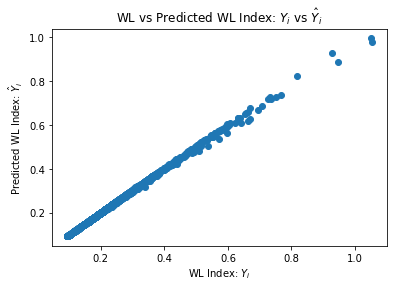

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt

y_pred = model.predict(X_test_t, batch_size=30) # 예측
plt.scatter(y_test, y_pred)
plt.xlabel("WL Index: $Y_i$")
plt.ylabel("Predicted WL Index: $\hat{Y}_i$")
plt.title("WL vs Predicted WL Index: $Y_i$ vs $\hat{Y}_i$")

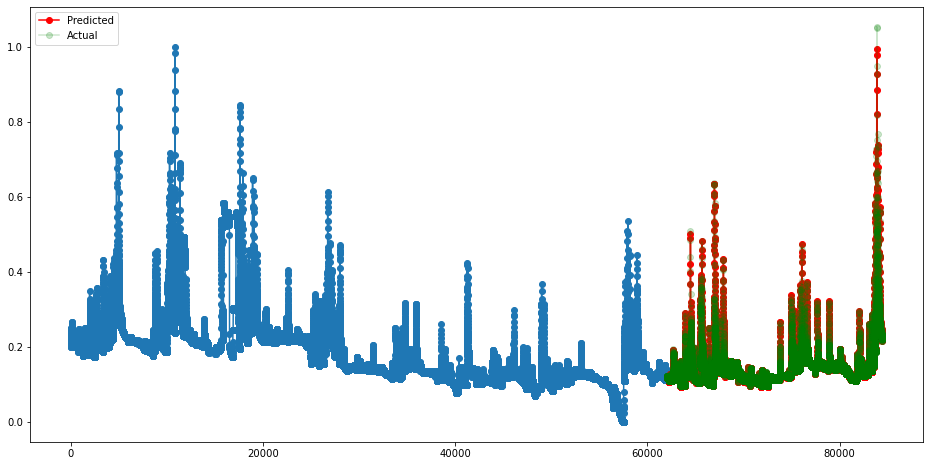

In [48]:
a_axis = np.arange(0, len(y_train))
b_axis = np.arange(len(y_train), len(y_train) + len(y_pred))

plt.figure(figsize=(16,8))
plt.plot(a_axis, y_train.reshape(62052,), 'o-')
plt.plot(b_axis, y_pred.reshape(22415,), 'o-', color='red', label='Predicted')
plt.plot(b_axis, y_test.reshape(22415,), 'o-', color='green', alpha=0.2, label='Actual')
plt.legend()
plt.show()